### Load Dataset
From the previous notebook, we managed to export retail data which are the top five largest province in the island of Java to .csv format. In this notebook, we'll use that same data and do further data manipulation/analysis. First thing we want to do is to load the dataset. See below:

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset retail_data on java island
retail_java = pd.read_csv("./retail_data_2019_java.csv", index_col=0)
retail_java.reset_index(drop=True, inplace=True)
retail_java['order_date'] = pd.to_datetime(retail_java['order_date'])
print("RETAIL JAVA DATAFRAME:")
display(retail_java.head())
print("RETAIL JAVA SHAPE: {}".format(retail_java.shape), retail_java.dtypes, sep="\n\n")

RETAIL JAVA DATAFRAME:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price
0,1612885,2019-01-01,16293,Malang,Jawa Timur,P1301,BRAND_F,6,747000,4482000
1,1612387,2019-01-01,17228,Bogor,Jawa Barat,P2086,BRAND_L,4,590000,2360000
2,1612903,2019-01-01,16775,Surakarta,Jawa Tengah,P1656,BRAND_G,3,1325000,3975000
3,1612702,2019-01-01,18119,Yogyakarta,Yogyakarta,P3813,BRAND_U,1,450000,450000
4,1612951,2019-01-01,16125,Jakarta Barat,DKI Jakarta,P1902,BRAND_J,10,695000,6950000


RETAIL JAVA SHAPE: (32735, 10)

order_id                int64
order_date     datetime64[ns]
customer_id             int64
city                   object
province               object
product_id             object
brand                  object
quantity                int64
item_price              int64
total_price             int64
dtype: object


### Group By Date and Province
Suppose we want to count how many orders come in every day and we want to use that to calculate average orders per month. First thing we can do is to **group** the data by **order_date** and **province** (to distinguish each province). Next, we can use pandas' method for DataFrame: `.unstack()` to move **province** index as column. This needed so that we could conduct every measurement (i.e. **order**, **customer**, etc.) analysis on each of the province.

In [2]:
# Group retail_java by 'order_date' and 'province' column
java_grouped = retail_java.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': 'sum'
})
print("JAVA GROUPED:")
display(java_grouped.head(10))

# Change java_grouped column's name
java_grouped.columns = ["order", "customer", "product", "brand", "GMV"]

# Unstack java_grouped to make 'order_date' as index and 'province' as column
java_unstacked = java_grouped.unstack(level='province').fillna(0)
print("\nJAVA UNSTACKED:")
display(java_unstacked.head())

JAVA GROUPED:


order_id  customer_id  product_id  brand  total_price
order_date province                                                          
2019-01-01 DKI Jakarta        21           20          40     16    357607000
           Jawa Barat          6            6          21      9     94335000
           Jawa Tengah         3            3          19     11     53933000
           Jawa Timur          3            3           9      9     69116000
           Yogyakarta          4            3          10      6   2884114000
2019-01-02 DKI Jakarta        10           10          28     14    149577000
           Jawa Barat          7            7          26     11    172395000
           Jawa Tengah         1            1           2      2     13760000
           Jawa Timur          2            2           3      2     92570000
           Yogyakarta          1            1           6      4    122160000


JAVA UNSTACKED:


order                                               \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta   
order_date                                                            
2019-01-01        21.0        6.0         3.0        3.0        4.0   
2019-01-02        10.0        7.0         1.0        2.0        1.0   
2019-01-03         9.0        2.0         8.0        4.0        3.0   
2019-01-04        18.0        5.0         5.0        0.0        4.0   
2019-01-05        13.0        7.0         2.0        2.0        2.0   

              customer                                               ...  \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta  ...   
order_date                                                           ...   
2019-01-01        20.0        6.0         3.0        3.0        3.0  ...   
2019-01-02        10.0        7.0         1.0        2.0        1.0  ...   
2019-01-03         9.0        2.0         7.0        4.0        3.0  ...   
2019-01-04        17.0        5.0         4.0        0.0        4.0  ...   
2019-01-05        13.0        7.0         2.0        2.0        2.0  ...   

                 brand                                               \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta   
order_date                                                            
2019-01-01        16.0        9.0        11.0        9.0        6.0   
2019-01-02        14.0       11.0         2.0        2.0        4.0   
2019-01-03        14.0        3.0        12.0        4.0        8.0   
2019-01-04        16.0        9.0        12.0        0.0       13.0   
2019-01-05        16.0        8.0         3.0        3.0        4.0   

                    GMV                                                      
province    DKI Jakarta   Jawa Barat  Jawa Tengah  Jawa Timur    Yogyakarta  
order_date                                                                   
2019-01-01  357607000.0   94335000.0   53933000.0  69116000.0  2.884114e+09  
2019-01-02  149577000.0  172395000.0   13760000.0  92570000.0  1.221600e+08  
2019-01-03  112692000.0   19620000.0  271542000.0  32195000.0  6.404500e+07  
2019-01-04  274770000.0  102269000.0  178734000.0         0.0  3.508500e+07  
2019-01-05  223951000.0  206605000.0   18173000.0  38523000.0  1.749900e+07  

[5 rows x 25 columns]

### Plot Every Measurements
Now we could create a function to extract monthly average size of each measurement (i.e. **order** count, **customer** count, average **GMV**, etc.). We can go further and try to plot every measurement's monthly average using **matplotlib**. See below:

In [3]:
# Define function to plot each measurement/column in retail_java
def monthly_mean(df, col):
    # Slice DataFrame with the selected column
    slc = pd.IndexSlice
    for_examine = df.loc[:, slc[col]]
    
    # Resample to monthly and count the average
    monthly_df = for_examine.resample('M').mean()
    return monthly_df

# Get all monthly resampled measurement of java_unstacked
container = []
for idx, val in enumerate(java_grouped.columns):
    container.append(monthly_mean(java_unstacked, val))

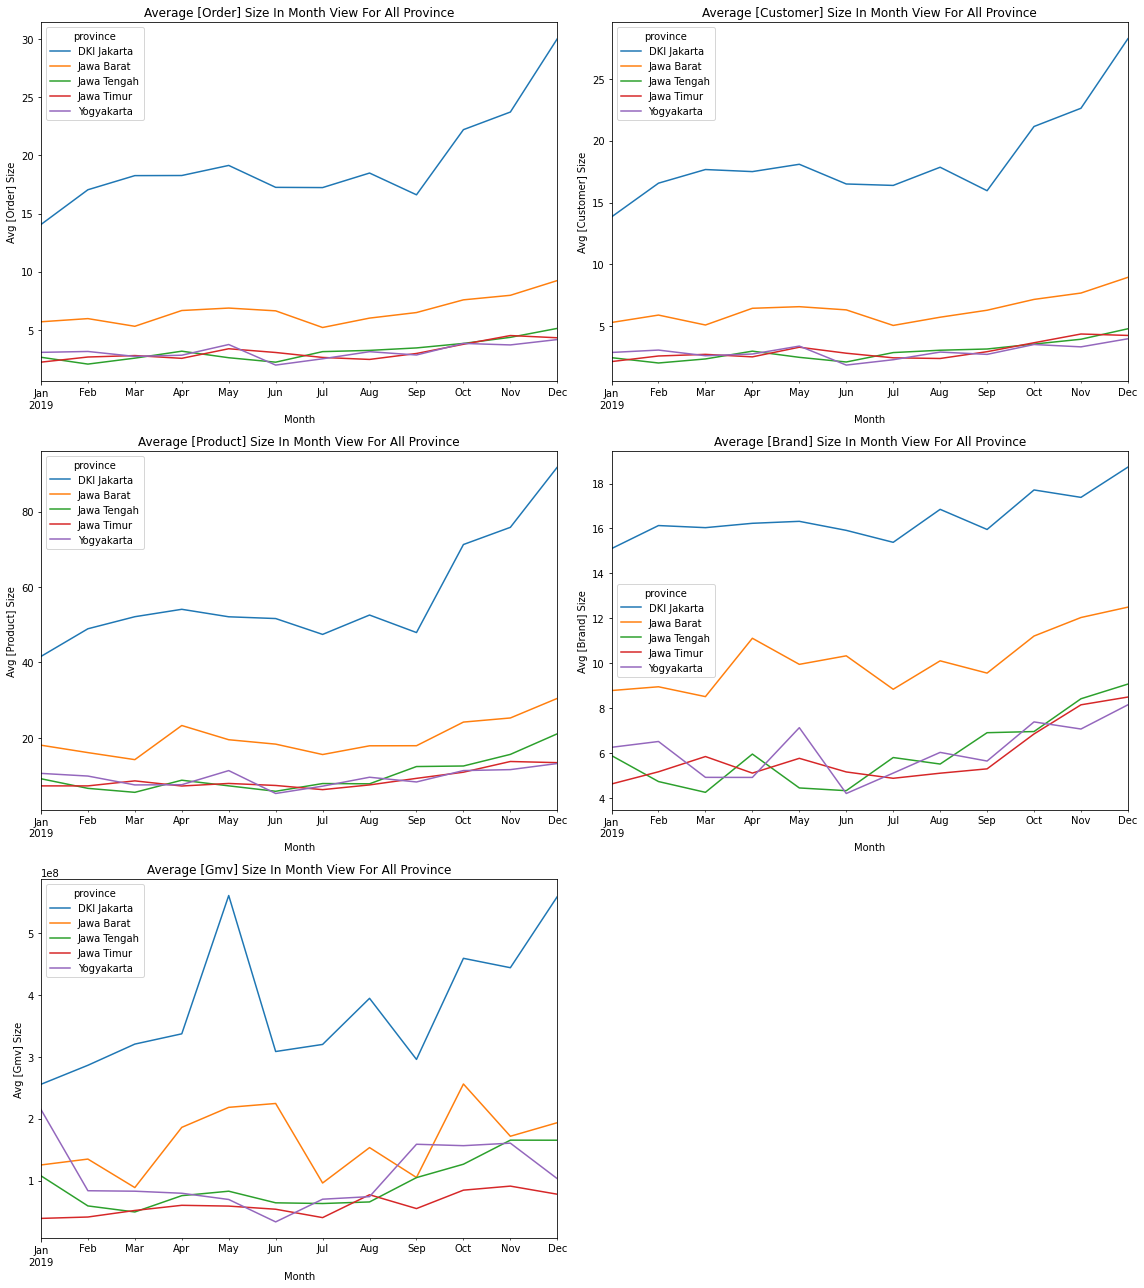

In [4]:
%matplotlib inline
fig, axes = plt.subplots(3, 2, figsize=(16,18))
axes = axes.flatten()

for idx, val in enumerate(java_grouped.columns):
    container[idx].plot(
        title="average [{}] size in month view for all province".format(val).title(),
        ax = axes[idx]
    )
    axes[idx].set_ylabel("avg [{}] size".format(val).title())
    axes[idx].set_xlabel("Month")

axes[-1].remove()
plt.tight_layout()
plt.show()
fig.savefig('./img/measurements_avg_all.png')